In [1]:
import pandas as pd

# Replace 'path_to_file' with the actual path to your CSV file
file_path = 'coldplay.csv'

# Load the CSV file into a Pandas DataFrame
coldplay_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(coldplay_df.head())


   Unnamed: 0.1  Unnamed: 0                          title   tag    artist  \
0         29862       30242                     Lost Remix  rock  Coldplay   
1         45905       46777                   Viva la Vida  rock  Coldplay   
2         46885       47782               Strawberry Swing  rock  Coldplay   
3         47219       48132  Every Teardrop Is a Waterfall  rock  Coldplay   
4         48929       49891                 Speed of Sound  rock  Coldplay   

   year    views features                                             lyrics  \
0  2008    54912  {JAY-Z}  just because im losing doesnt mean im lost doe...   
1  2008  1597729       {}  i used to rule the world seas would rise when ...   
2  2008   100375       {}  they were sitting they were sitting on the str...   
3  2011    85482       {}  i turn the music up i got my records on i shut...   
4  2005    82835       {}  how long before i get in before it starts befo...   

      id language_cld3  no_of_lines  no_of_words  

In [2]:
coldplay_df.head()

,Unnamed: 0.1,Unnamed: 0,title,tag,artist,year,views,features,lyrics,id,language_cld3,no_of_lines,no_of_words
0,29862,30242,Lost Remix,rock,Coldplay,2008,54912,{JAY-Z},just because im losing doesnt mean im lost doe...,31963,en,51,284
1,45905,46777,Viva la Vida,rock,Coldplay,2008,1597729,{},i used to rule the world seas would rise when ...,49192,en,73,329
2,46885,47782,Strawberry Swing,rock,Coldplay,2008,100375,{},they were sitting they were sitting on the str...,50435,en,49,187
3,47219,48132,Every Teardrop Is a Waterfall,rock,Coldplay,2011,85482,{},i turn the music up i got my records on i shut...,50735,en,50,263
4,48929,49891,Speed of Sound,rock,Coldplay,2005,82835,{},how long before i get in before it starts befo...,52706,en,62,327


In [3]:
# Drop the specified columns from the DataFrame
coldplay_df = coldplay_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'language_cld3', 'views', 'features'])

# Display the modified DataFrame
coldplay_df.head()


,title,tag,artist,year,lyrics,id,no_of_lines,no_of_words
0,Lost Remix,rock,Coldplay,2008,just because im losing doesnt mean im lost doe...,31963,51,284
1,Viva la Vida,rock,Coldplay,2008,i used to rule the world seas would rise when ...,49192,73,329
2,Strawberry Swing,rock,Coldplay,2008,they were sitting they were sitting on the str...,50435,49,187
3,Every Teardrop Is a Waterfall,rock,Coldplay,2011,i turn the music up i got my records on i shut...,50735,50,263
4,Speed of Sound,rock,Coldplay,2005,how long before i get in before it starts befo...,52706,62,327


In [4]:
# Assuming 'lyrics' is the column you want to check for duplicates
coldplay_df.drop_duplicates(subset='lyrics', inplace=True)

# Now coldplay_df has duplicates removed based on the 'lyrics' column


In [8]:
coldplay_df.describe()

,year,id,no_of_lines,no_of_words
count,337.000000,3.370000e+02,337.000000,337.000000
mean,2011.439169,2.392915e+06,39.768546,194.623145
std,6.915089,2.107184e+06,16.190270,85.477252
min,1998.000000,3.196300e+04,4.000000,24.000000
25%,2005.000000,4.176720e+05,29.000000,144.000000
50%,2014.000000,1.933260e+06,38.000000,186.000000
75%,2017.000000,4.134856e+06,50.000000,235.000000
max,2023.000000,7.732905e+06,96.000000,621.000000


In [9]:
coldplay_df.tail()

,title,tag,artist,year,lyrics,id,no_of_lines,no_of_words
341,Have Yourself A Merry Little Christmas Jo Whil...,rock,Coldplay,2020,have yourself a merry little christmas let you...,7468042,22,108
342,Forever Whatever,pop,Coldplay,2022,forever never ever never ever never forever ne...,7491188,55,285
343,Family Tree A Head Full of Dreams Demo,pop,Coldplay,2021,never have i ever felt this way before not eve...,7522686,48,271
344,Break of Dawn Vampire Symphony,pop,Coldplay,2023,a little drunk a little hurt inside i went ove...,7523336,79,462
345,Day n Nite Spotify Singles,rock,Coldplay,2022,day and night i toss and turn i keep stressing...,7732905,56,366


In [10]:
# Get unique values from the 'tag' column
unique_tags = coldplay_df['tag'].unique()

# Display the unique tags
print("Different types of tags in coldplay_df:")
print(unique_tags)


Different types of tags in coldplay_df:
['rock' 'pop' 'rap']


In [11]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

# Assuming coldplay_df is your DataFrame with a 'lyrics' column
# If not, replace 'lyrics' with the actual column name containing the lyrics

# Load the lyrics from the DataFrame
lyrics = coldplay_df['lyrics'].astype(str)

# Tokenize the lyrics into words
tokens = [word_tokenize(lyric) for lyric in lyrics]

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each lyric
sentiment_scores = [sia.polarity_scores(' '.join(token)) for token in tokens]

# Create a DataFrame to store sentiment scores
sentiment_df = pd.DataFrame(sentiment_scores)

# Concatenate the sentiment DataFrame with the original DataFrame
coldplay_df = pd.concat([coldplay_df, sentiment_df], axis=1)

# Display the DataFrame with sentiment scores
print(coldplay_df[['lyrics', 'compound', 'neg', 'neu', 'pos']])


C:\Users\Dhrumil\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


                                                lyrics  compound    neg  \
0    just because im losing doesnt mean im lost doe...   -0.7296  0.137   
1    i used to rule the world seas would rise when ...   -0.6061  0.041   
2    they were sitting they were sitting on the str...    0.9881  0.013   
3    i turn the music up i got my records on i shut...   -0.9776  0.133   
4    how long before i get in before it starts befo...   -0.0644  0.017   
..                                                 ...       ...    ...   
152                                                NaN   -0.8750  0.093   
156                                                NaN    0.4404  0.113   
166                                                NaN    0.5719  0.033   
190                                                NaN    0.9963  0.024   
274                                                NaN   -0.9509  0.184   

       neu    pos  
0    0.736  0.127  
1    0.935  0.024  
2    0.777  0.210  
3    0.841  0.026  

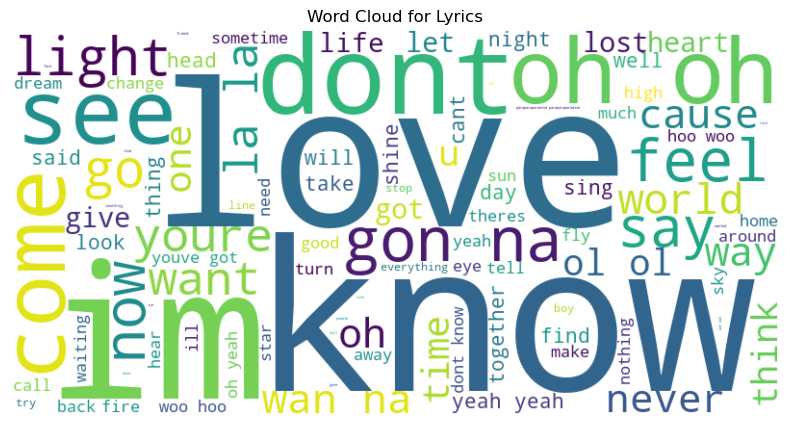

In [13]:
import pandas as pd
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming coldplay_df is your DataFrame with a 'lyrics' column
# If not, replace 'lyrics' with the actual column name containing the lyrics

# Load the lyrics from the DataFrame
lyrics = coldplay_df['lyrics'].astype(str)

# Tokenize the lyrics into words
tokens = ' '.join([word for lyric in lyrics for word in word_tokenize(lyric)])

# Generate and plot the WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(tokens)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Lyrics')
plt.show()


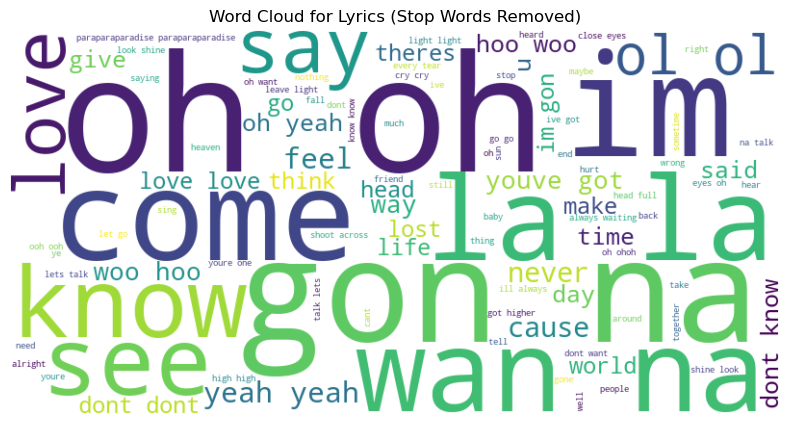

In [14]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming coldplay_df is your DataFrame with a 'lyrics' column
# If not, replace 'lyrics' with the actual column name containing the lyrics

# Load the English stop words
stop_words = set(stopwords.words('english'))

# Load the lyrics from the DataFrame
lyrics = coldplay_df['lyrics'].astype(str)

# Tokenize the lyrics into words, remove stop words
tokens = ' '.join([word for lyric in lyrics for word in word_tokenize(lyric) if word.lower() not in stop_words])

# Generate and plot the WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(tokens)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Lyrics (Stop Words Removed)')
plt.show()


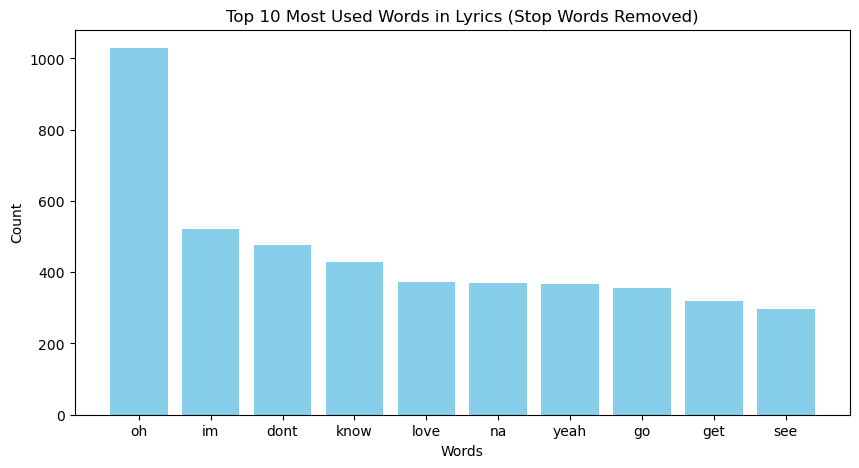

In [15]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming coldplay_df is your DataFrame with a 'lyrics' column
# If not, replace 'lyrics' with the actual column name containing the lyrics

# Load the English stop words
stop_words = set(stopwords.words('english'))

# Load the lyrics from the DataFrame
lyrics = coldplay_df['lyrics'].astype(str)

# Tokenize the lyrics into words, remove stop words
tokens = [word.lower() for lyric in lyrics for word in word_tokenize(lyric) if word.lower() not in stop_words]

# Count the occurrences of each word
word_counts = Counter(tokens)

# Get the top 10 most common words
top_words = word_counts.most_common(10)

# Prepare data for plotting
words, counts = zip(*top_words)

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Used Words in Lyrics (Stop Words Removed)')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()


In [17]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Assuming coldplay_df is your DataFrame with a 'lyrics' column
# If not, replace 'lyrics' with the actual column name containing the lyrics

# Load the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Handle NaN values in the 'lyrics' column
coldplay_df['lyrics'] = coldplay_df['lyrics'].fillna('')  # Replace NaN with an empty string

# Apply sentiment analysis to each lyric and create a new column 'sentiment_score'
coldplay_df['sentiment_score'] = coldplay_df['lyrics'].apply(lambda lyric: sia.polarity_scores(str(lyric))['compound'])

# Categorize sentiments into positive, negative, and neutral based on the compound score
coldplay_df['sentiment'] = coldplay_df['sentiment_score'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

# Display the DataFrame with sentiment analysis results
print(coldplay_df[['title', 'artist', 'sentiment_score', 'sentiment']])


                             title    artist  sentiment_score sentiment
0                       Lost Remix  Coldplay          -0.7296  negative
1                     Viva la Vida  Coldplay          -0.6061  negative
2                 Strawberry Swing  Coldplay           0.9881  positive
3    Every Teardrop Is a Waterfall  Coldplay          -0.9776  negative
4                   Speed of Sound  Coldplay          -0.0644  negative
..                             ...       ...              ...       ...
340                            NaN       NaN           0.0000   neutral
341                            NaN       NaN           0.0000   neutral
342                            NaN       NaN           0.0000   neutral
343                            NaN       NaN           0.0000   neutral
344                            NaN       NaN           0.0000   neutral

[345 rows x 4 columns]


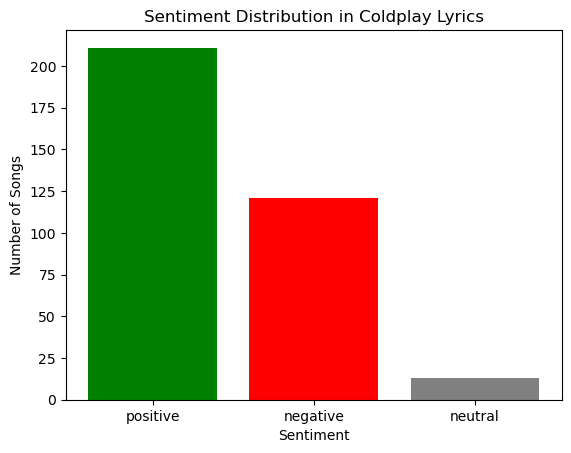

In [18]:
import matplotlib.pyplot as plt

# Assuming coldplay_df is your DataFrame with 'sentiment' column
# If not, replace 'sentiment' with the actual column name containing sentiment labels

# Count the occurrences of each sentiment
sentiment_counts = coldplay_df['sentiment'].value_counts()

# Plot the bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution in Coldplay Lyrics')
plt.xlabel('Sentiment')
plt.ylabel('Number of Songs')
plt.show()


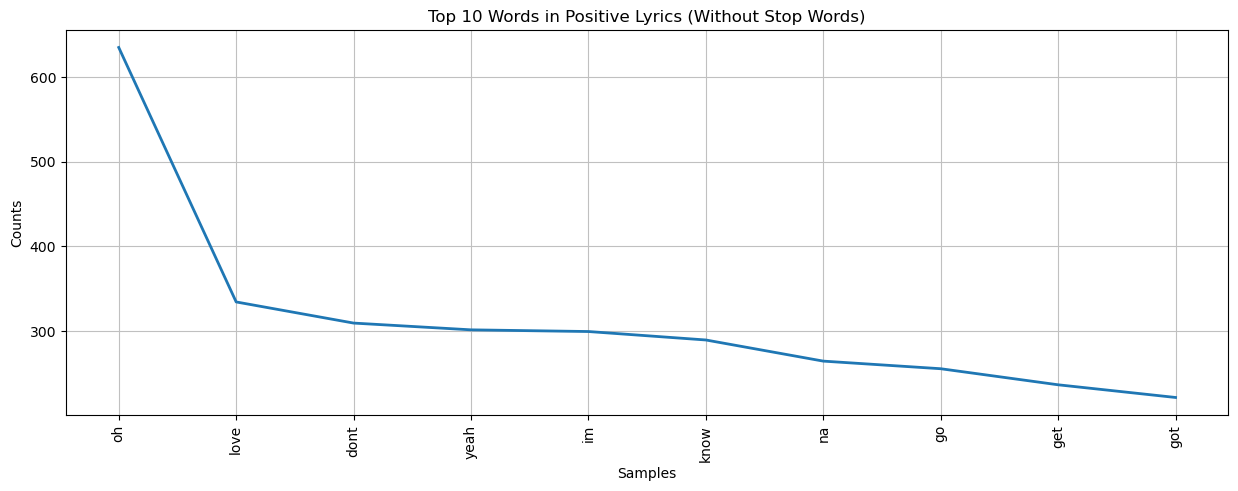

In [21]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Assuming you have already performed sentiment analysis and have 'positive' sentiment labeled in 'sentiment' column
positive_lyrics = coldplay_df[coldplay_df['sentiment'] == 'positive']['lyrics']

# Tokenize the positive lyrics into words
positive_tokens = word_tokenize(' '.join(positive_lyrics))

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_positive_tokens = [word.lower() for word in positive_tokens if word.isalnum() and word.lower() not in stop_words]

# Generate word frequency distribution
fd_positive = FreqDist(filtered_positive_tokens)

# Plot word frequency distribution for positive lyrics
plt.figure(figsize=(15, 5))
fd_positive.plot(10, title='Top 10 Words in Positive Lyrics (Without Stop Words)', cumulative=False)
plt.show()


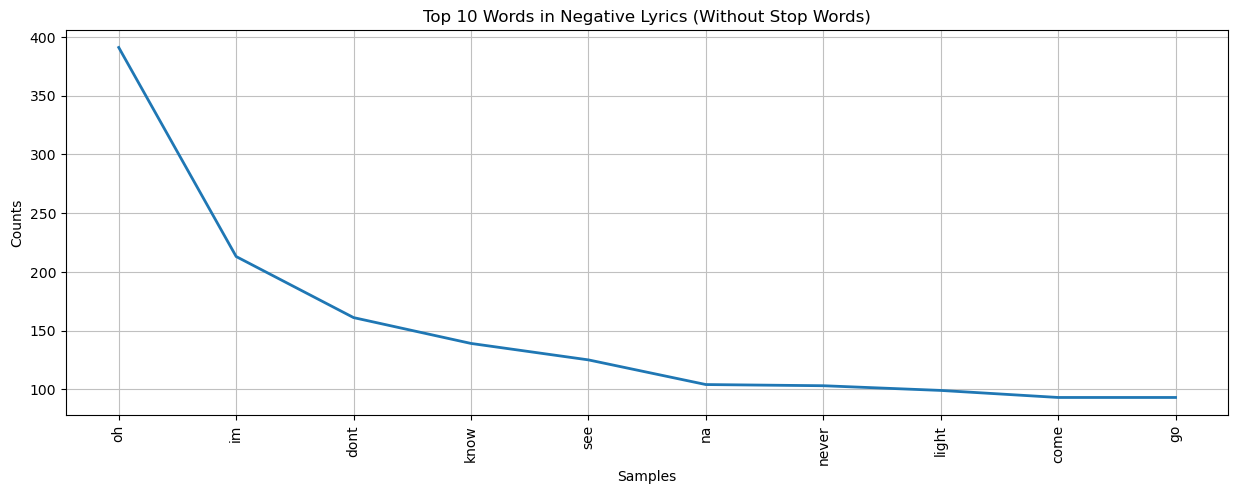

In [22]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Assuming you have already performed sentiment analysis and have 'negative' sentiment labeled in 'sentiment' column
negative_lyrics = coldplay_df[coldplay_df['sentiment'] == 'negative']['lyrics']

# Tokenize the negative lyrics into words
negative_tokens = word_tokenize(' '.join(negative_lyrics))

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_negative_tokens = [word.lower() for word in negative_tokens if word.isalnum() and word.lower() not in stop_words]

# Generate word frequency distribution
fd_negative = FreqDist(filtered_negative_tokens)

# Plot word frequency distribution for negative lyrics
plt.figure(figsize=(15, 5))
fd_negative.plot(10, title='Top 10 Words in Negative Lyrics (Without Stop Words)', cumulative=False)
plt.show()

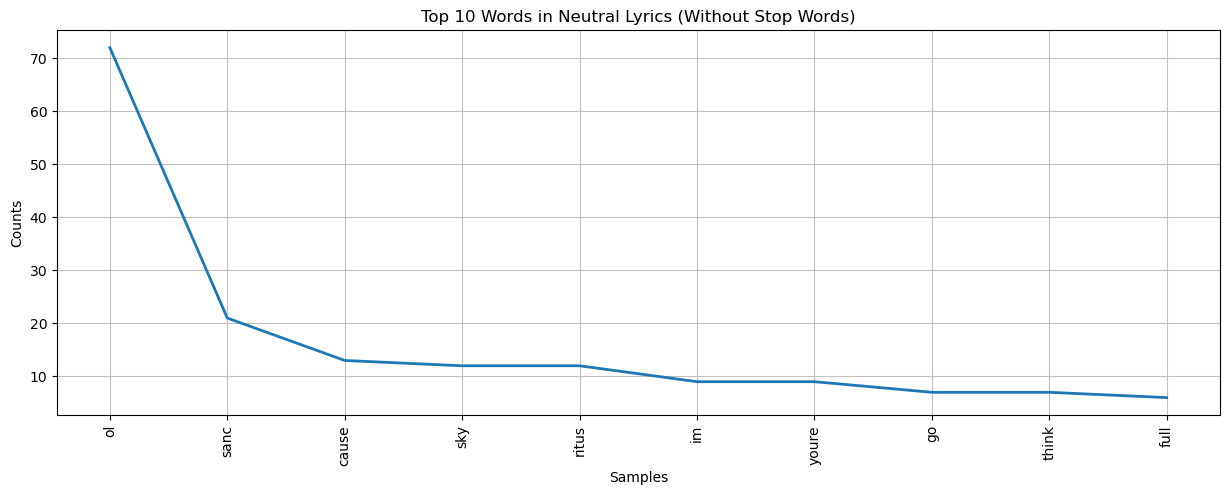

In [23]:
neutral_lyrics = coldplay_df[coldplay_df['sentiment'] == 'neutral']['lyrics']

# Tokenize the neutral lyrics into words
neutral_tokens = word_tokenize(' '.join(neutral_lyrics))

# Remove stop words
filtered_neutral_tokens = [word.lower() for word in neutral_tokens if word.isalnum() and word.lower() not in stop_words]

# Generate word frequency distribution
fd_neutral = FreqDist(filtered_neutral_tokens)

# Plot word frequency distribution for neutral lyrics
plt.figure(figsize=(15, 5))
fd_neutral.plot(10, title='Top 10 Words in Neutral Lyrics (Without Stop Words)', cumulative=False)
plt.show()

In [26]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer



# Load the NLTK sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each lyric and create a new column 'sentiment_score'
coldplay_df['sentiment_score'] = coldplay_df['lyrics'].apply(lambda lyric: sia.polarity_scores(lyric)['compound'])

# Categorize sentiments into positive, negative, and neutral based on the compound score
coldplay_df['sentiment'] = coldplay_df['sentiment_score'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

# Print the DataFrame with sentiment scores and categories
print(coldplay_df[['title', 'sentiment_score', 'sentiment']])


                             title  sentiment_score sentiment
0                       Lost Remix          -0.7296  negative
1                     Viva la Vida          -0.6061  negative
2                 Strawberry Swing           0.9881  positive
3    Every Teardrop Is a Waterfall          -0.9776  negative
4                   Speed of Sound          -0.0644  negative
..                             ...              ...       ...
340                            NaN           0.0000   neutral
341                            NaN           0.0000   neutral
342                            NaN           0.0000   neutral
343                            NaN           0.0000   neutral
344                            NaN           0.0000   neutral

[345 rows x 3 columns]


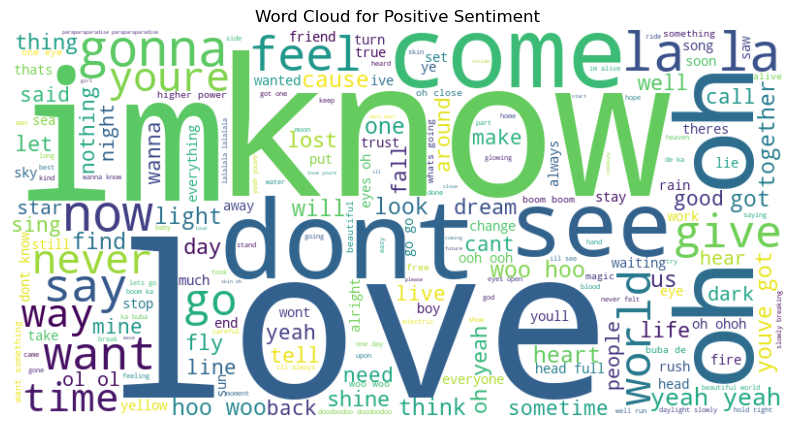

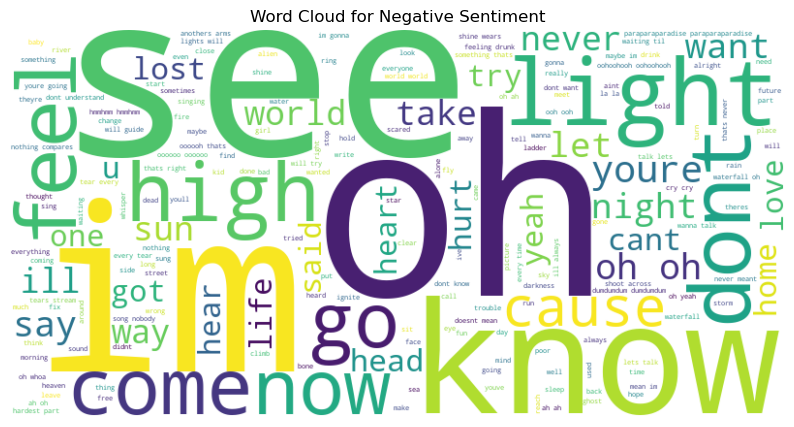

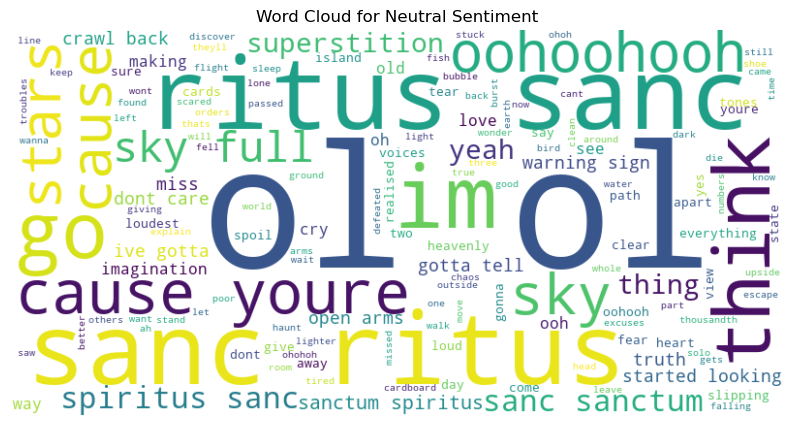

In [27]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the NLTK sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each lyric and create a new column 'sentiment_score'
coldplay_df['sentiment_score'] = coldplay_df['lyrics'].apply(lambda lyric: sia.polarity_scores(lyric)['compound'])

# Categorize sentiments into positive, negative, and neutral based on the compound score
coldplay_df['sentiment'] = coldplay_df['sentiment_score'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

# Word clouds for positive, negative, and neutral sentiments
for sentiment_category in ['positive', 'negative', 'neutral']:
    # Combine lyrics of the same sentiment category into a single string
    sentiment_lyrics = ' '.join(coldplay_df[coldplay_df['sentiment'] == sentiment_category]['lyrics'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_lyrics)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_category.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()


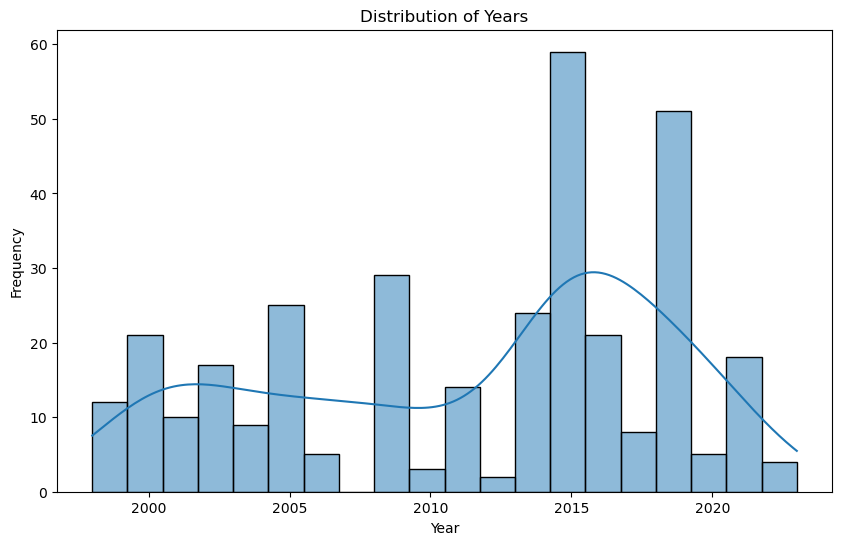

In [30]:
# Distribution of the 'year' column
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(coldplay_df['year'], bins=20, kde=True)
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


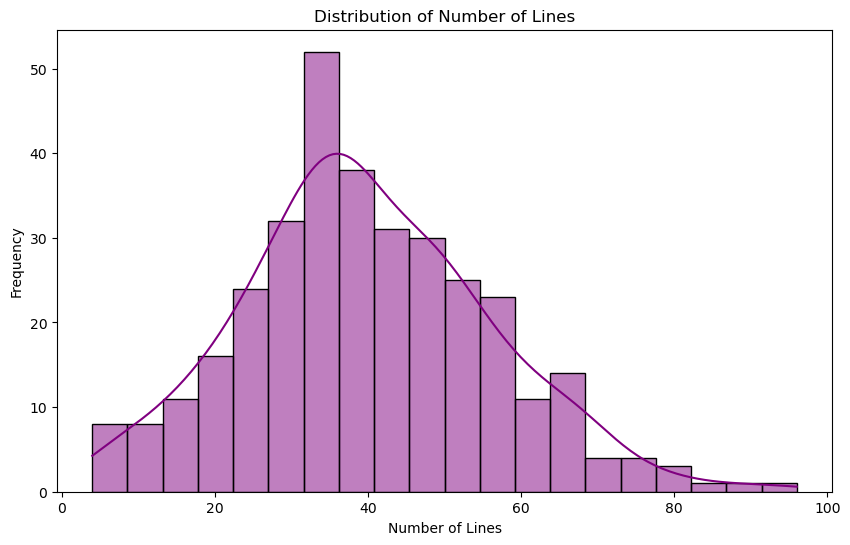

In [33]:
# Distribution of the number of lines
plt.figure(figsize=(10, 6))
sns.histplot(coldplay_df['no_of_lines'], bins=20, kde=True, color = "purple")
plt.title('Distribution of Number of Lines')
plt.xlabel('Number of Lines')
plt.ylabel('Frequency')
plt.show()

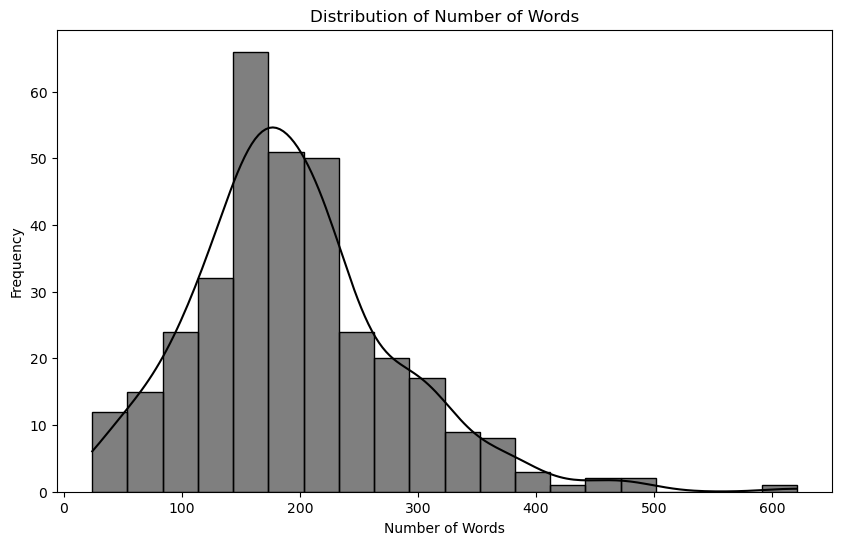

In [35]:
# Distribution of the number of words
plt.figure(figsize=(10, 6))
sns.histplot(coldplay_df['no_of_words'], bins=20, kde=True, color = "black")
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [37]:
coldplay_df

,title,tag,artist,year,lyrics,id,no_of_lines,no_of_words,neg,neu,pos,compound,neg,neu,pos,compound,sentiment_score,sentiment
0,Lost Remix,rock,Coldplay,2008.0,just because im losing doesnt mean im lost doe...,31963.0,51.0,284.0,0.137,0.736,0.127,-0.7296,0.137,0.736,0.127,-0.7296,-0.7296,negative
1,Viva la Vida,rock,Coldplay,2008.0,i used to rule the world seas would rise when ...,49192.0,73.0,329.0,0.041,0.935,0.024,-0.6061,0.041,0.935,0.024,-0.6061,-0.6061,negative
2,Strawberry Swing,rock,Coldplay,2008.0,they were sitting they were sitting on the str...,50435.0,49.0,187.0,0.013,0.777,0.210,0.9881,0.013,0.777,0.210,0.9881,0.9881,positive
3,Every Teardrop Is a Waterfall,rock,Coldplay,2011.0,i turn the music up i got my records on i shut...,50735.0,50.0,263.0,0.133,0.841,0.026,-0.9776,0.133,0.841,0.026,-0.9776,-0.9776,negative
4,Speed of Sound,rock,Coldplay,2005.0,how long before i get in before it starts befo...,52706.0,62.0,327.0,0.017,0.967,0.016,-0.0644,0.017,0.967,0.016,-0.0644,-0.0644,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.093,0.892,0.015,-0.8750,0.000,1.000,0.000,0.0000,0.0000,neutral
341,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.113,0.745,0.142,0.4404,0.000,1.000,0.000,0.0000,0.0000,neutral
342,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.033,0.862,0.104,0.5719,0.000,1.000,0.000,0.0000,0.0000,neutral
343,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.024,0.724,0.252,0.9963,0.000,1.000,0.000,0.0000,0.0000,neutral


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Drop rows with NaN values in the 'lyrics' column
coldplay_df = coldplay_df.dropna(subset=['lyrics'])

# Feature extraction using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(coldplay_df['lyrics']).toarray()

# Encode the 'sentiment' column to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(coldplay_df['sentiment'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.41      0.58        22
     neutral       0.50      1.00      0.67         2
    positive       0.79      0.98      0.87        45

    accuracy                           0.80        69
   macro avg       0.76      0.80      0.71        69
weighted avg       0.85      0.80      0.77        69



The RandomOverSampler from the imblearn library is employed to balance the classes by generating synthetic samples for the minority classes (negative and positive sentiments in this case). This helps in addressing the issue of imbalanced datasets, where one class may have significantly fewer samples than the others. After oversampling, the logistic regression classifier is trained on the resampled training data and evaluated on the original test set. This approach ensures that the model is exposed to a balanced representation of all sentiment classes during training.

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler



# Extract relevant columns
X = coldplay_df['lyrics']
y = coldplay_df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply TF-IDF vectorization to convert lyrics into numerical features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Apply oversampling to balance the classes
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_tfidf, y_train)

# Train a logistic regression classifier
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.73      0.73      0.73        22
     neutral       0.22      1.00      0.36         2
    positive       0.87      0.73      0.80        45

    accuracy                           0.74        69
   macro avg       0.61      0.82      0.63        69
weighted avg       0.80      0.74      0.76        69



In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


# Convert sentiment labels to numerical values
label_encoder = LabelEncoder()
coldplay_df['sentiment_encoded'] = label_encoder.fit_transform(coldplay_df['sentiment'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(coldplay_df['lyrics'], coldplay_df['sentiment_encoded'], test_size=0.2, random_state=42)

# Vectorize the lyrics using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.05      0.09        22
     neutral       0.00      0.00      0.00         2
    positive       0.66      1.00      0.80        45

    accuracy                           0.67        69
   macro avg       0.55      0.35      0.29        69
weighted avg       0.75      0.67      0.55        69

Accuracy: 0.6666666666666666


C:\Users\Dhrumil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhrumil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhrumil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
